In [6]:
# 使下面的代码支持python2和python3
from __future__ import division, print_function, unicode_literals

# 查看python的版本是否为3.5及以上
import sys
assert sys.version_info >= (3, 5)

# 查看sklearn的版本是否为0.20及以上
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os 

# 在每一次的运行后获得的结果与这个notebook的结果相同
np.random.seed(42) 

# 让matplotlib的图效果更好
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 设置保存图片的途径
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    '''
    运行即可保存自动图片
    
    fig_id : 图片名称
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# 忽略掉没用的警告 (Scipy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [7]:
df = pd.read_excel("data.xlsx", engine="openpyxl")

## 数据探索

In [8]:
df.head()

,Sample type,天然：1,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
0,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.09,NaN,NaN,NaN,29.61,NaN,NaN,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.18,NaN,NaN,NaN,29.17,NaN,NaN,22.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.41,NaN,NaN,NaN,24.42,NaN,NaN,22.53,NaN,NaN,NaN,NaN,5.16,NaN,NaN,NaN,0.000
3,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.37,NaN,NaN,NaN,22.81,NaN,NaN,22.12,NaN,NaN,NaN,NaN,7.61,NaN,NaN,NaN,0.000
4,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.47,NaN,NaN,NaN,18.96,NaN,NaN,22.49,NaN,NaN,NaN,NaN,10.81,NaN,NaN,NaN,0.106


In [6]:
df.columns

Index(['Sample type', '天然：1', 'SiO2', 'TiO2', 'Al2O3', 'Cr2O3', 'FeOtot',
       'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'NiO', 'ZnO', 'Li2O',
       'ZrO2', 'V2O5', 'Fe3+/Fetot'],
      dtype='object')

In [9]:
# 建立副本，以免修改原数据
dataset = df.iloc[:, 2:]

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SiO2        390 non-null    float64
 1   TiO2        354 non-null    float64
 2   Al2O3       364 non-null    float64
 3   Cr2O3       348 non-null    float64
 4   FeOtot      390 non-null    float64
 5   MnO         330 non-null    float64
 6   MgO         379 non-null    float64
 7   CaO         390 non-null    float64
 8   Na2O        380 non-null    float64
 9   K2O         169 non-null    float64
 10  P2O5        5 non-null      float64
 11  NiO         171 non-null    float64
 12  ZnO         15 non-null     float64
 13  Li2O        5 non-null      float64
 14  ZrO2        3 non-null      float64
 15  V2O5        8 non-null      float64
 16  Fe3+/Fetot  390 non-null    float64
dtypes: float64(17)
memory usage: 51.9 KB


In [11]:
dataset.describe()

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
count,390.000000,354.000000,3.640000e+02,348.000000,390.000000,330.000000,3.790000e+02,3.900000e+02,380.000000,1.690000e+02,5.000000,171.000000,1.500000e+01,5.000000,3.000000,8.000000e+00,390.000000
mean,52.588121,0.683474,5.634114e+00,0.804728,5.821023,0.112056,1.436257e+01,1.817262e+01,2.171707,3.023375e-02,0.205200,0.050912,7.260000e+00,7.684000,0.640000,4.200004e-02,0.277177
std,3.169816,1.334923,4.238189e+00,1.418578,7.056935,0.130789,4.487865e+00,5.577510e+00,2.221430,7.362901e-02,0.321835,0.070330,9.673504e+00,0.122558,0.372424,3.600392e-02,0.214405
min,41.620000,0.000000,1.000000e-07,0.000000,0.040000,0.000000,1.000000e-07,1.000000e-07,0.000000,0.000000e+00,0.040000,0.000000,1.000000e-07,7.500000,0.420000,1.000000e-07,0.000000
25%,51.220000,0.090000,2.460000e+00,0.070000,2.542500,0.040000,1.246000e+01,1.780750e+01,1.000000,1.000000e-07,0.055000,0.020000,1.000000e-07,7.621000,0.425000,1.000000e-07,0.154775
50%,52.415000,0.340000,5.795000e+00,0.710000,3.295000,0.090000,1.510000e+01,1.980000e+01,1.570000,5.000000e-03,0.061000,0.040000,1.000000e-07,7.739000,0.430000,5.650000e-02,0.230000
75%,54.777500,0.630000,7.102500e+00,1.160000,6.662500,0.120000,1.637000e+01,2.107250e+01,2.112500,3.000000e-02,0.090000,0.060000,1.292500e+01,7.760000,0.750000,6.925000e-02,0.320000
max,64.960000,9.760000,2.821600e+01,23.670000,54.350000,0.930000,3.975000e+01,2.550000e+01,12.980000,6.300000e-01,0.780000,0.470000,2.690000e+01,7.800000,1.070000,8.400000e-02,1.000000


Saving figure data_describe


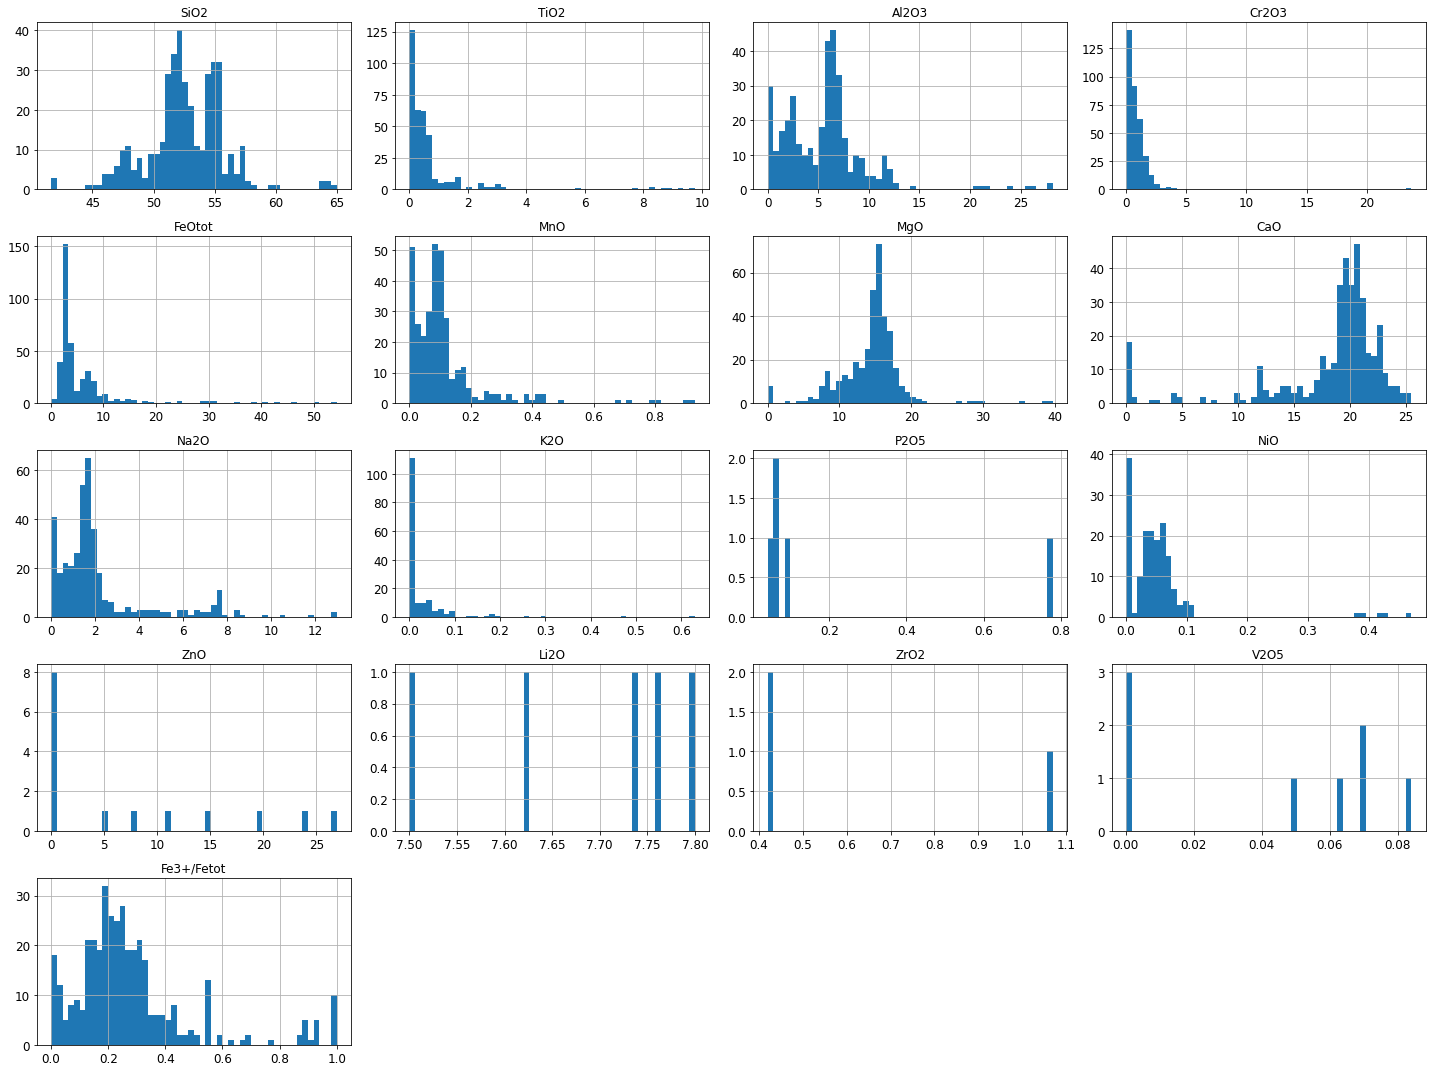

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# 用柱状图的方式表示出来，横坐标为含量，纵坐标为数量
dataset.hist(bins=50, figsize=(20, 15))
save_fig('data_describe')
plt.show()

In [13]:
# 查找每对属性间的皮尔逊相关系数，即相关系数矩阵
corr_matrix = dataset.corr()

In [14]:
corr_matrix

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
SiO2,1.000000,-0.147970,0.086674,0.084975,-0.373479,-0.278171,0.053447,-0.298423,0.346860,0.041493,-0.547651,0.101765,-0.901960,0.387234,0.983195,0.291250,0.277212
TiO2,-0.147970,1.000000,-0.056922,-0.152735,-0.040777,-0.007273,-0.139259,0.128355,-0.009840,-0.057670,-0.188904,-0.152378,NaN,0.252945,-0.238957,0.151551,0.105109
Al2O3,0.086674,-0.056922,1.000000,-0.067491,-0.219126,-0.088014,-0.416861,-0.281077,0.262907,-0.039198,-0.416450,-0.007463,NaN,-0.017285,-0.557137,-0.733644,0.398238
Cr2O3,0.084975,-0.152735,-0.067491,1.000000,-0.185514,-0.060642,0.008497,-0.069348,0.173983,-0.045668,NaN,0.029392,NaN,NaN,NaN,0.847341,0.136139
FeOtot,-0.373479,-0.040777,-0.219126,-0.185514,1.000000,0.344348,-0.358755,-0.475406,0.023268,0.080445,0.506131,-0.133151,0.348216,0.004801,0.784918,-0.438791,-0.060955
MnO,-0.278171,-0.007273,-0.088014,-0.060642,0.344348,1.000000,-0.183629,-0.043607,-0.045479,-0.025438,0.618937,-0.152764,NaN,-0.245729,0.594172,0.286214,0.088149
MgO,0.053447,-0.139259,-0.416861,0.008497,-0.358755,-0.183629,1.000000,0.189288,-0.586601,-0.051134,0.375507,0.145662,NaN,0.602549,0.094267,0.411657,-0.423090
CaO,-0.298423,0.128355,-0.281077,-0.069348,-0.475406,-0.043607,0.189288,1.000000,-0.354904,-0.023971,0.576144,-0.015756,0.526712,0.224392,0.147530,0.074784,-0.195911
Na2O,0.346860,-0.009840,0.262907,0.173983,0.023268,-0.045479,-0.586601,-0.354904,1.000000,0.052979,-0.149329,-0.019380,NaN,0.042606,0.054443,-0.672321,0.443645
K2O,0.041493,-0.057670,-0.039198,-0.045668,0.080445,-0.025438,-0.051134,-0.023971,0.052979,1.000000,0.959983,0.254495,NaN,0.240925,NaN,NaN,-0.133499


In [15]:
# 查看每个属性和目标值的相关系数（只测量线性关系），接近1表示强正相关，接近-1表示强负相关，接近0表示没有线性关系
corr_matrix["Fe3+/Fetot"].sort_values(ascending=False)

Fe3+/Fetot    1.000000
ZrO2          0.511582
Na2O          0.443645
Al2O3         0.398238
SiO2          0.277212
Li2O          0.220511
Cr2O3         0.136139
NiO           0.132259
TiO2          0.105109
MnO           0.088149
FeOtot       -0.060955
K2O          -0.133499
CaO          -0.195911
V2O5         -0.393636
MgO          -0.423090
P2O5         -0.564129
ZnO          -0.634439
Name: Fe3+/Fetot, dtype: float64

Saving figure corr_four


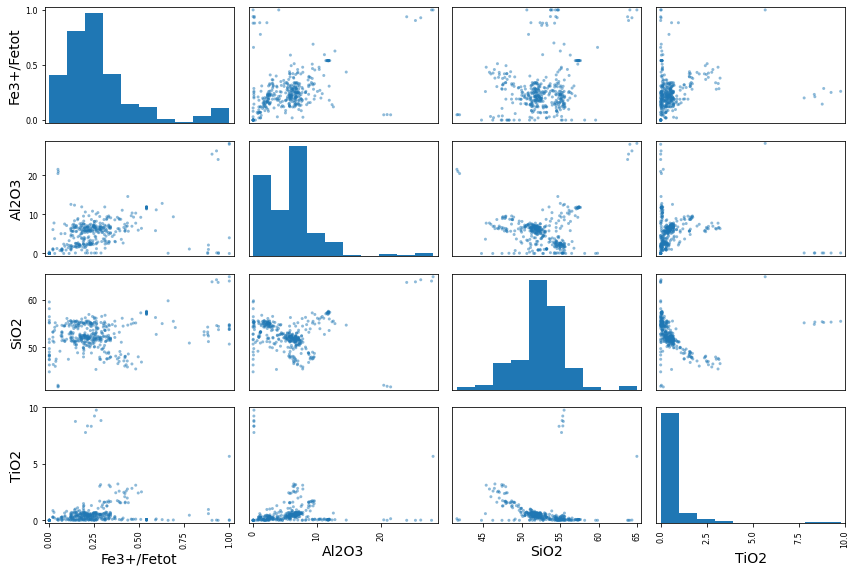

In [16]:
from pandas.plotting import scatter_matrix

# 查看前四个相关系数最大的属性的分布
attributes = ['Fe3+/Fetot', 'Al2O3', 'SiO2', 'TiO2']
scatter_matrix(dataset[attributes], figsize=(12, 8))
save_fig('corr_four')

In [17]:
# 查看哪一列含空值
dataset.isnull().any(axis=0)

SiO2          False
TiO2           True
Al2O3          True
Cr2O3          True
FeOtot        False
MnO            True
MgO            True
CaO           False
Na2O           True
K2O            True
P2O5           True
NiO            True
ZnO            True
Li2O           True
ZrO2           True
V2O5           True
Fe3+/Fetot    False
dtype: bool

In [18]:
# 填充空缺值
dataset.fillna(0, inplace=True)

In [19]:
# drop()会创建一份数据备份，不会影响train_set，X为特征值，y为标签值
X = dataset.drop("Fe3+/Fetot", axis=1)
y = dataset["Fe3+/Fetot"].copy()

In [20]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# X_train的维度
X_train.shape

(312, 16)

In [22]:
# y_train的维度
y_train.shape

(312,)

In [23]:
"""
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 可进行中位数、众数等填充
# 可以将特征值标准化，即转化成正态分布
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), 
        ('std_scaler', StandardScaler())
    ])

major_el_processed = num_pipeline.fit_transform(major_el)
"""

"\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import StandardScaler\n\n# 可进行中位数、众数等填充\n# 可以将特征值标准化，即转化成正态分布\nnum_pipeline = Pipeline([\n        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), \n        ('std_scaler', StandardScaler())\n    ])\n\nmajor_el_processed = num_pipeline.fit_transform(major_el)\n"

## 线性回归

In [24]:
from sklearn.linear_model import LinearRegression

# 线性回归模型, y = a1x1 + a2x2 + ··· + a14x14 + b
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
# 线性回归模型的系数
lin_reg.coef_

array([-4.11985553e-02, -5.66815504e-03, -1.13629046e-02,  1.45832599e-03,
        2.04571377e-02, -2.11231213e-01,  4.47910266e-02,  3.22198257e-02,
        1.66929125e-01, -2.50454748e-01,  6.19943558e-02,  9.56561266e-02,
        1.11144937e-02,  4.10704353e-01, -3.87202199e-01, -1.97846310e+00])

In [26]:
# 线性回归模型的截距
lin_reg.intercept_

0.8030765342460157

In [27]:
# 测试集的预测值
y_test_prediction = lin_reg.predict(X_test)
print("Prediction:", y_test_prediction)

Prediction: [-0.06257384  0.58894289  0.82488684  0.30165966  0.39406     1.07121093
  0.24903501  0.20770954  0.29106375  0.30425776  0.39948493  0.28356756
  0.20555357  0.3272181   0.29914064  0.16777754  0.239856    0.204059
  0.27180087  0.07402682  0.12352209  0.24820978  0.37011707  0.28700968
  0.22829521  0.23932608  0.26052133  0.30979713  0.2825402   1.18301761
  0.993235    0.3372271   0.11671896  0.20029605  0.27479989  0.23964669
  0.24786894  0.05341789  0.32286992  0.24620759  0.26170604  0.3660755
  0.25995732  0.29954303  0.087314    0.4006292   0.20562297  0.2742204
  0.28925168  0.2665049   0.17650619  0.24216496  0.20915131  0.0845473
  0.78874585  0.27080565  0.28066868  0.53597757  0.18323824  1.14844462
  0.25463152  0.34951085  0.34554113  0.21315057  0.20886274  0.264901
  0.04172191  0.30280631  0.38631222  0.18179052  0.24748476  1.09129011
  0.27284938  0.18333603  0.11541212  0.12257268  0.19745325  0.44124501]


In [28]:
# 测试集的真实值
print("Real Value:", list(y_test))

Real Value: [0.0, 1.0, 1.0, 0.261, 0.15, 0.929, 0.283, 0.19, 0.34, 0.228, 0.23, 0.285, 0.212, 0.433, 0.195, 0.21, 0.302, 0.033, 0.189, 0.07, 0.0, 0.18, 0.18, 0.195, 0.249, 0.168, 0.234, 0.32, 0.229, 0.938, 0.904, 0.88, 0.282, 0.185, 0.152, 0.198, 0.32, 0.0, 0.48, 0.18, 0.19, 0.59, 0.261, 0.3, 0.219, 0.88, 0.246, 0.16, 0.219, 0.191, 0.098, 0.18, 0.254, 0.0, 0.86, 0.256, 0.388, 0.627, 0.308, 0.86, 0.227, 0.54, 0.54, 0.176, 0.2339, 0.166, 0.038, 0.88, 0.35, 0.07, 0.18, 1.0, 0.494, 0.07, 0.0, 0.0, 0.105, 0.455]


In [29]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, y_test_prediction)
lin_rmse = np.sqrt(lin_mse) # 均方根误差
lin_rmse

0.15694197802231352

In [30]:
from sklearn.metrics import mean_absolute_error

# 平均绝对误差
lin_mae = mean_absolute_error(y_test, y_test_prediction) 
lin_mae

0.10955822804527471

In [31]:
from sklearn.model_selection import cross_val_score

# 五折交叉验证来评估模型性能
scores = cross_val_score(lin_reg, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

In [32]:
def display_scores(scores):
    # 获得模型性能的评估，和测量评估的准确性（标准差）
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(lin_rmse_scores)

Scores: [0.40386192 0.14154536 0.56943921 0.18854328 0.19856928]
Mean: 0.30039180908813723
Standard deviation: 0.16198930822729846


## 多项式回归

In [33]:
from sklearn.preprocessing import PolynomialFeatures

# 让训练集中每个特征的平方作为新的特征，获得扩展的特征集   
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly包含原始特征并加上这个特征的平方
X_train_poly = poly_features.fit_transform(X_train) 

In [34]:
# 扩展特征集的列名
column_names = poly_features.get_feature_names()
column_names

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x1 x15',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x2 x15',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x3 x14',
 'x3 x15',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x4 x14',
 'x4 x15',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x5 x14',
 'x5 x15',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x

In [35]:
df1 = pd.DataFrame(X_train_poly)
df1.columns = column_names

In [36]:
# x0~x9 是X_train的特征值
df1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12^2,x12 x13,x12 x14,x12 x15,x13^2,x13 x14,x13 x15,x14^2,x14 x15,x15^2
0,51.71,0.80,7.16,0.62,2.97,0.68,14.72,19.91,2.20,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51.22,0.47,6.35,0.70,3.09,0.08,15.00,20.29,1.43,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.97,0.30,3.12,0.17,7.26,0.15,16.84,20.74,0.20,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,54.10,0.22,2.94,1.24,2.49,0.00,17.00,19.70,1.99,1.000000e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51.59,0.24,6.92,0.82,2.58,0.12,15.27,20.99,1.25,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_train.head()

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5
291,51.71,0.80,7.16,0.62,2.97,0.68,14.72,19.91,2.20,0.000000e+00,0.0,0.06,0.0,0.0,0.0,0.0
63,51.22,0.47,6.35,0.70,3.09,0.08,15.00,20.29,1.43,0.000000e+00,0.0,0.02,0.0,0.0,0.0,0.0
239,51.97,0.30,3.12,0.17,7.26,0.15,16.84,20.74,0.20,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0
353,54.10,0.22,2.94,1.24,2.49,0.00,17.00,19.70,1.99,1.000000e-07,0.0,0.00,0.0,0.0,0.0,0.0
219,51.59,0.24,6.92,0.82,2.58,0.12,15.27,20.99,1.25,0.000000e+00,0.0,0.04,0.0,0.0,0.0,0.0


In [38]:
# 获得十四元二次多项式回归方程
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [39]:
# 多项式回归方程的系数
poly_reg.coef_

array([ 4.83973909e-01,  9.22581277e-01, -1.07869280e-01,  1.97590112e+00,
       -8.66679384e-01,  7.77210513e+00, -1.34234396e+00, -7.86162264e-01,
       -3.69412549e+00,  7.36953884e+00, -1.91997750e-02, -4.33926964e+01,
       -1.87571048e-01, -4.49053002e-04,  2.76683029e-01, -6.27339350e-02,
       -5.25615606e-03,  2.55035136e-02,  4.80119945e-03,  2.46894084e-03,
        2.06256188e-03,  2.03884090e-01,  5.12156932e-03, -7.51981834e-03,
        2.14804021e-02, -2.10989192e-01, -1.88147143e+00,  6.77704359e-01,
       -5.89845423e-03, -2.87623088e-02,  1.91566215e+00, -1.19541014e+00,
       -1.04566300e-02,  1.23547769e-02, -5.50011337e-02, -4.77586653e-02,
        9.54898312e-01, -8.42104332e-02, -3.08333836e-02, -1.46582100e-01,
       -2.23740279e+00,  8.39998573e-02,  5.97361386e-01, -1.98694440e-06,
       -1.34715666e-07,  5.33129417e-01, -3.22263422e+00, -4.51047042e-04,
       -2.33611268e-02,  1.29257244e-03, -1.38412547e-01, -2.33119077e-03,
       -5.52942003e-03, -

In [40]:
# 多项式回归方程的截距
poly_reg.intercept_

9.80403552551376

In [41]:
# 匹配对应的特征和系数
pairs = [(np.around(k, decimals=3), v) for k, v in zip(poly_reg.coef_, column_names)]
pairs

[(0.484, 'x0'),
 (0.923, 'x1'),
 (-0.108, 'x2'),
 (1.976, 'x3'),
 (-0.867, 'x4'),
 (7.772, 'x5'),
 (-1.342, 'x6'),
 (-0.786, 'x7'),
 (-3.694, 'x8'),
 (7.37, 'x9'),
 (-0.019, 'x10'),
 (-43.393, 'x11'),
 (-0.188, 'x12'),
 (-0.0, 'x13'),
 (0.277, 'x14'),
 (-0.063, 'x15'),
 (-0.005, 'x0^2'),
 (0.026, 'x0 x1'),
 (0.005, 'x0 x2'),
 (0.002, 'x0 x3'),
 (0.002, 'x0 x4'),
 (0.204, 'x0 x5'),
 (0.005, 'x0 x6'),
 (-0.008, 'x0 x7'),
 (0.021, 'x0 x8'),
 (-0.211, 'x0 x9'),
 (-1.881, 'x0 x10'),
 (0.678, 'x0 x11'),
 (-0.006, 'x0 x12'),
 (-0.029, 'x0 x13'),
 (1.916, 'x0 x14'),
 (-1.195, 'x0 x15'),
 (-0.01, 'x1^2'),
 (0.012, 'x1 x2'),
 (-0.055, 'x1 x3'),
 (-0.048, 'x1 x4'),
 (0.955, 'x1 x5'),
 (-0.084, 'x1 x6'),
 (-0.031, 'x1 x7'),
 (-0.147, 'x1 x8'),
 (-2.237, 'x1 x9'),
 (0.084, 'x1 x10'),
 (0.597, 'x1 x11'),
 (-0.0, 'x1 x12'),
 (-0.0, 'x1 x13'),
 (0.533, 'x1 x14'),
 (-3.223, 'x1 x15'),
 (-0.0, 'x2^2'),
 (-0.023, 'x2 x3'),
 (0.001, 'x2 x4'),
 (-0.138, 'x2 x5'),
 (-0.002, 'x2 x6'),
 (-0.006, 'x2 x7'),
 (-

In [42]:
def poly_reg_formula(poly_reg_coef, poly_reg_intercept, column_names):
    """输出多项式回归的表达式
    
    :param poly_reg_coef: 系数
    :param poly_reg_intercept: 截距
    :param column_names: 特征
    """
    
    term = []
    coef = list(np.around(poly_reg_coef, decimals=3))
    for i in range(len(coef)):
        # 第一个值保持不变
        if i == 0:
            # 如果系数为0，则不加入列表
            if coef[i] != 0:
                temp = str(coef[i]) + column_names[i]
                term.append(temp)
        else:
            # 如果系数为正值，在系数前加上+号, 如果系数为负值，维持不变, 如果系数为0，则不加入列表
            if coef[i] > 0:
                temp = '+' + str(coef[i]) + column_names[i]
                term.append(temp)
            elif coef[i] < 0:
                temp = str(coef[i]) + column_names[i]
                term.append(temp)
    if poly_reg.intercept_ >= 0:
        # 多项式回归的表达式
        formula = ''.join(term) + '+' + str(poly_reg_intercept)
        print(formula)
    else:
        formula = ''.join(term) + str(poly_reg.intercept_)
        print(formula)

In [43]:
poly_reg_formula(poly_reg.coef_, poly_reg.intercept_, column_names)

0.484x0+0.923x1-0.108x2+1.976x3-0.867x4+7.772x5-1.342x6-0.786x7-3.694x8+7.37x9-0.019x10-43.393x11-0.188x12+0.277x14-0.063x15-0.005x0^2+0.026x0 x1+0.005x0 x2+0.002x0 x3+0.002x0 x4+0.204x0 x5+0.005x0 x6-0.008x0 x7+0.021x0 x8-0.211x0 x9-1.881x0 x10+0.678x0 x11-0.006x0 x12-0.029x0 x13+1.916x0 x14-1.195x0 x15-0.01x1^2+0.012x1 x2-0.055x1 x3-0.048x1 x4+0.955x1 x5-0.084x1 x6-0.031x1 x7-0.147x1 x8-2.237x1 x9+0.084x1 x10+0.597x1 x11+0.533x1 x14-3.223x1 x15-0.023x2 x3+0.001x2 x4-0.138x2 x5-0.002x2 x6-0.006x2 x7-0.001x2 x8+0.336x2 x9-0.173x2 x10+0.673x2 x11-0.013x2 x13+4.468x2 x14+0.12x2 x15+0.028x3^2-0.013x3 x4-0.314x3 x5-0.063x3 x6-0.039x3 x7-0.122x3 x8-0.387x3 x9-4.019x3 x10+1.434x3 x11-2.608x3 x15+0.007x4^2-0.299x4 x5+0.019x4 x6+0.021x4 x7+0.041x4 x8+0.141x4 x9+0.572x4 x10+0.425x4 x11+0.015x4 x12-2.912x4 x14-3.339x4 x15+0.055x5^2-0.518x5 x6-0.382x5 x7-0.936x5 x8+0.447x5 x9+0.064x5 x10-1.0x5 x11-0.624x5 x14-0.199x5 x15+0.014x6^2+0.033x6 x7+0.06x6 x8+0.209x6 x9+1.84x6 x10+0.006x6 x11+0.241x6 x14

In [44]:
# X_test_poly包含原始特征并加上特征的平方
X_test_poly = poly_features.fit_transform(X_test) 
# 测试集的预测值
y_test_poly_prediction = poly_reg.predict(X_test_poly)
y_test_poly_prediction

array([ 1.66761673e-01,  1.14026341e+00,  9.79305430e-01,  7.99393639e-01,
        2.78386945e-01,  9.57053235e+00,  1.86990797e-01,  1.77450641e-01,
        1.60754837e-01,  4.02249027e-01,  2.80729767e-01,  3.41065170e-01,
        2.59510875e-01,  4.00117891e-01,  2.02741744e-01,  1.69394157e-01,
        2.72023195e-01,  1.52971469e-01,  2.46161876e-01,  1.24858769e-01,
       -1.06576076e-01,  1.77102410e-01,  3.92732517e-01,  2.49901255e-01,
        2.29781532e-01,  1.20782936e-01,  2.55584364e-01,  2.41617566e-01,
        2.87151818e-01,  5.35516396e+00,  9.79338400e+00,  6.01826348e-01,
        3.93178987e-01,  2.30066361e-01,  2.35649640e-01,  2.27693302e-01,
        2.48524635e-01, -8.00718411e-02,  4.60448912e-01,  2.36874888e-01,
        2.74017061e-01,  3.82786730e-01,  2.52093071e-01,  2.90642191e-01,
        3.13230437e-01,  8.26819979e-01,  1.69852249e-01,  2.51824515e-01,
        2.94304917e-01,  2.97212709e-01,  1.34545229e-01,  2.38372532e-01,
        1.72311316e-01,  

In [45]:
# 测试集的真实值
np.array((y_test))

array([0.    , 1.    , 1.    , 0.261 , 0.15  , 0.929 , 0.283 , 0.19  ,
       0.34  , 0.228 , 0.23  , 0.285 , 0.212 , 0.433 , 0.195 , 0.21  ,
       0.302 , 0.033 , 0.189 , 0.07  , 0.    , 0.18  , 0.18  , 0.195 ,
       0.249 , 0.168 , 0.234 , 0.32  , 0.229 , 0.938 , 0.904 , 0.88  ,
       0.282 , 0.185 , 0.152 , 0.198 , 0.32  , 0.    , 0.48  , 0.18  ,
       0.19  , 0.59  , 0.261 , 0.3   , 0.219 , 0.88  , 0.246 , 0.16  ,
       0.219 , 0.191 , 0.098 , 0.18  , 0.254 , 0.    , 0.86  , 0.256 ,
       0.388 , 0.627 , 0.308 , 0.86  , 0.227 , 0.54  , 0.54  , 0.176 ,
       0.2339, 0.166 , 0.038 , 0.88  , 0.35  , 0.07  , 0.18  , 1.    ,
       0.494 , 0.07  , 0.    , 0.    , 0.105 , 0.455 ])

In [47]:
# 均方根误差
poly_reg_mse = mean_squared_error(y_test, y_test_poly_prediction)
poly_reg_rmse = np.sqrt(poly_reg_mse) 
poly_reg_rmse

1.8958742903025627

In [48]:
# 平均绝对误差
poly_reg_mae = mean_absolute_error(y_test, y_test_poly_prediction) 
poly_reg_mae

0.513539254935632

In [49]:
# 五折交叉验证来评估模型性能
scores = cross_val_score(poly_reg, X_train_poly, y_train,
                        scoring="neg_mean_squared_error", cv=5)
poly_reg_rmse = np.sqrt(-scores)

In [50]:
display_scores(poly_reg_rmse)

Scores: [5.20463117 0.13054397 0.46118252 0.84584215 1.6627094 ]
Mean: 1.6609818406370551
Standard deviation: 1.8441076327448518


## 正则化线性回归模型

In [51]:
from sklearn.linear_model import SGDRegressor, Ridge, Lasso

# 脊回归
ridge_reg = SGDRegressor(penalty="l2")
ridge_reg = Ridge()
# Lasso回归
lasso_reg = SGDRegressor(penalty="l1")
lasso_reg = Lasso()

In [52]:
from sklearn.linear_model import ElasticNet

# 用弹性网络对多项式回归进行正则化，它的正则项相当于Ridge回归和Lasso回归正则项的简单混合
elastic_net = ElasticNet(alpha=0.3, l1_ratio=0.3, max_iter=100000, tol=0.0005)
elastic_net.fit(X_train_poly, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.3, max_iter=100000, tol=0.0005)

In [53]:
# 经过正则化后的多项式回归方程系数
elastic_net.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.99234823e-04, -3.83630371e-04,  1.46666356e-04, -0.00000000e+00,
       -3.69468709e-05, -6.08113166e-04,  2.88402325e-04, -4.99005111e-04,
        1.95848942e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.12680118e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.12358048e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.91406965e-03,
        0.00000000e+00, -

In [54]:
# 经过正则化后的多项式回归方程截距
elastic_net.intercept_

0.64532008456724

In [55]:
# 弹性网络的表达式
poly_reg_formula(elastic_net.coef_, elastic_net.intercept_, column_names)

-0.001x0 x5+0.002x0 x8+0.001x0 x13+0.001x2^2-0.002x2 x6-0.004x2 x8-0.001x3 x6+0.001x4 x7+0.001x6 x7+0.002x6 x8+0.001x7^2+0.001x7 x8+0.64532008456724


In [56]:
# 经正则化的多项式回归模型的预测值
elastic_net_prediction = elastic_net.predict(X_test_poly)
elastic_net_prediction

array([ 0.13346132,  0.56419316,  0.78168716,  0.2970983 ,  0.33350459,
        0.82379935,  0.22691346,  0.19222138,  0.21047854,  0.27435319,
        0.35505548,  0.27441477,  0.19809448,  0.35031545,  0.24308118,
        0.2365946 ,  0.21178559,  0.24088296,  0.25557052,  0.13860938,
        0.17229444,  0.22813096,  0.39891782,  0.26764276,  0.2027794 ,
        0.23214681,  0.25206265,  0.25367438,  0.2945222 ,  0.69666576,
        0.76238128,  0.32894379,  0.15327517,  0.19505054,  0.23799138,
        0.23222056,  0.22313644, -0.0086417 ,  0.36013716,  0.21951906,
        0.24309658,  0.37926559,  0.24906305,  0.24993458,  0.1690921 ,
        0.42673321,  0.20381522,  0.26447564,  0.26710138,  0.24242598,
        0.17707799,  0.20638792,  0.20245869,  0.11617491,  0.73003934,
        0.24360186,  0.30618216,  0.49683492,  0.17066406,  0.94248891,
        0.23661112,  0.39156672,  0.39141402,  0.22965876,  0.21565562,
        0.24778765,  0.05979799,  0.33574067,  0.34020626,  0.18

In [57]:
# 测试集的真实值
np.array(y_test)

array([0.    , 1.    , 1.    , 0.261 , 0.15  , 0.929 , 0.283 , 0.19  ,
       0.34  , 0.228 , 0.23  , 0.285 , 0.212 , 0.433 , 0.195 , 0.21  ,
       0.302 , 0.033 , 0.189 , 0.07  , 0.    , 0.18  , 0.18  , 0.195 ,
       0.249 , 0.168 , 0.234 , 0.32  , 0.229 , 0.938 , 0.904 , 0.88  ,
       0.282 , 0.185 , 0.152 , 0.198 , 0.32  , 0.    , 0.48  , 0.18  ,
       0.19  , 0.59  , 0.261 , 0.3   , 0.219 , 0.88  , 0.246 , 0.16  ,
       0.219 , 0.191 , 0.098 , 0.18  , 0.254 , 0.    , 0.86  , 0.256 ,
       0.388 , 0.627 , 0.308 , 0.86  , 0.227 , 0.54  , 0.54  , 0.176 ,
       0.2339, 0.166 , 0.038 , 0.88  , 0.35  , 0.07  , 0.18  , 1.    ,
       0.494 , 0.07  , 0.    , 0.    , 0.105 , 0.455 ])

In [60]:
# 均方根误差
elastic_net_mse = mean_squared_error(y_test, elastic_net_prediction)
elastic_net_rmse = np.sqrt(elastic_net_mse) 
elastic_net_rmse

0.15811278358800357

In [61]:
# 平均绝对误差
elastic_net_mae = mean_absolute_error(y_test, elastic_net_prediction) 
elastic_net_mae

0.1115694250892498

In [62]:
# 五折交叉验证来评估模型性能
scores = cross_val_score(elastic_net, X_train_poly, y_train,
                        scoring="neg_mean_squared_error", cv=5)
elastic_net_rmse_scores = np.sqrt(-scores)

In [63]:
display_scores(elastic_net_rmse_scores)

Scores: [0.36000331 0.13732924 0.12793233 0.18612416 0.11079137]
Mean: 0.18443608265124314
Standard deviation: 0.09128195362915932


## 微调模型

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

param_grid = [
    # 尝试 12 (3×4x1x1) 超参数组合
    {'alpha': [0.1, 0.2, 0.3], 'l1_ratio': [0.2, 0.3, 0.4, 0.5],
     'max_iter': [100000], 'tol': [0.0005]},   
  ]

elastic_net = ElasticNet(random_state=42)
# 五折交叉, 总共的训练次数达到 60 (12*5) 次
grid_search = GridSearchCV(elastic_net, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42),
             param_grid=[{'alpha': [0.1, 0.2, 0.3],
                          'l1_ratio': [0.2, 0.3, 0.4, 0.5],
                          'max_iter': [100000], 'tol': [0.0005]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
# 60个训练模型中最好的模型
best_estimator = grid_search.best_estimator_
best_estimator

ElasticNet(alpha=0.2, l1_ratio=0.3, max_iter=100000, random_state=42,
           tol=0.0005)

In [66]:
# 每一种超参数组合在交叉验证中最好的模型
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
	print(np.sqrt(-mean_score), params)

0.2943928084992711 {'alpha': 0.1, 'l1_ratio': 0.2, 'max_iter': 100000, 'tol': 0.0005}
0.2519177153563561 {'alpha': 0.1, 'l1_ratio': 0.3, 'max_iter': 100000, 'tol': 0.0005}
0.24128588715246416 {'alpha': 0.1, 'l1_ratio': 0.4, 'max_iter': 100000, 'tol': 0.0005}
0.23930125147155254 {'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 100000, 'tol': 0.0005}
0.24110024712485265 {'alpha': 0.2, 'l1_ratio': 0.2, 'max_iter': 100000, 'tol': 0.0005}
0.2380170498376921 {'alpha': 0.2, 'l1_ratio': 0.3, 'max_iter': 100000, 'tol': 0.0005}
0.24097939066296956 {'alpha': 0.2, 'l1_ratio': 0.4, 'max_iter': 100000, 'tol': 0.0005}
0.2454920333384755 {'alpha': 0.2, 'l1_ratio': 0.5, 'max_iter': 100000, 'tol': 0.0005}
0.2381402900250698 {'alpha': 0.3, 'l1_ratio': 0.2, 'max_iter': 100000, 'tol': 0.0005}
0.2435026678132159 {'alpha': 0.3, 'l1_ratio': 0.3, 'max_iter': 100000, 'tol': 0.0005}
0.2424057360007671 {'alpha': 0.3, 'l1_ratio': 0.4, 'max_iter': 100000, 'tol': 0.0005}
0.23823317452135573 {'alpha': 0.3, 'l1_ratio': 0.5

## 学习曲线

In [69]:
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    画学习曲线

    model: 模型
    X_train，y_train: 训练集
    X_val, y_val：验证集
    """
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-", linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

Saving figure linear_learning_curves


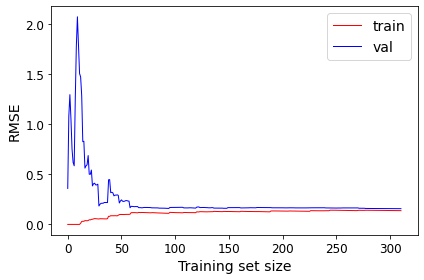

In [70]:
plot_learning_curves(lin_reg, X_train, y_train, X_test, y_test)
save_fig("linear_learning_curves")

Saving figure polynomial_learning_curves


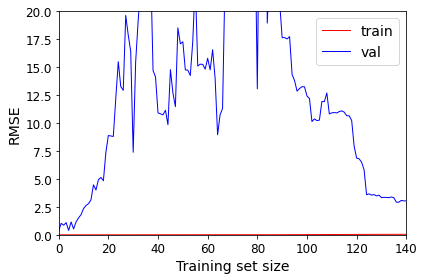

In [71]:
plot_learning_curves(poly_reg, X_train_poly, y_train, X_test_poly, y_test)
plt.axis([0, 140, 0, 20])
save_fig("polynomial_learning_curves")

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004474342465846104, tolerance: 0.00016294756
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007570563918202211, tolerance: 0.00017102782857142862
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You 

Saving figure regularized_polynomial_learning_curves


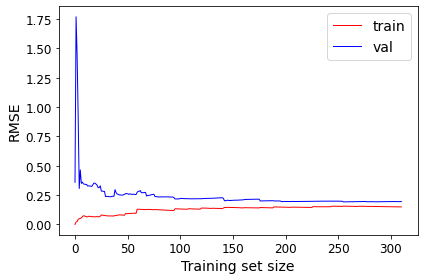

In [72]:
plot_learning_curves(elastic_net, X_train_poly, y_train, X_test_poly, y_test)
save_fig("regularized_polynomial_learning_curves")

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,), dtype={int, float}
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       scoring="neg_root_mean_squared_error",
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, -(train_scores_mean - train_scores_std),
                         -(train_scores_mean + train_scores_std), alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, -(test_scores_mean - test_scores_std),
                         -(test_scores_mean + test_scores_std), alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, -train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, -test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

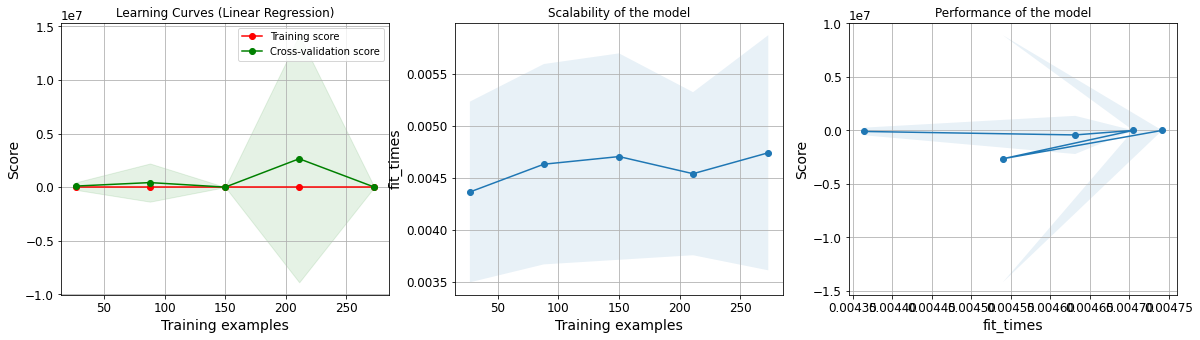

In [84]:
from sklearn.linear_model import LinearRegression
cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
estimator = LinearRegression()
title = "Learning Curves (Linear Regression)"
plot_learning_curve(estimator, title, X, y,
                    n_jobs=-1, cv=cv)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

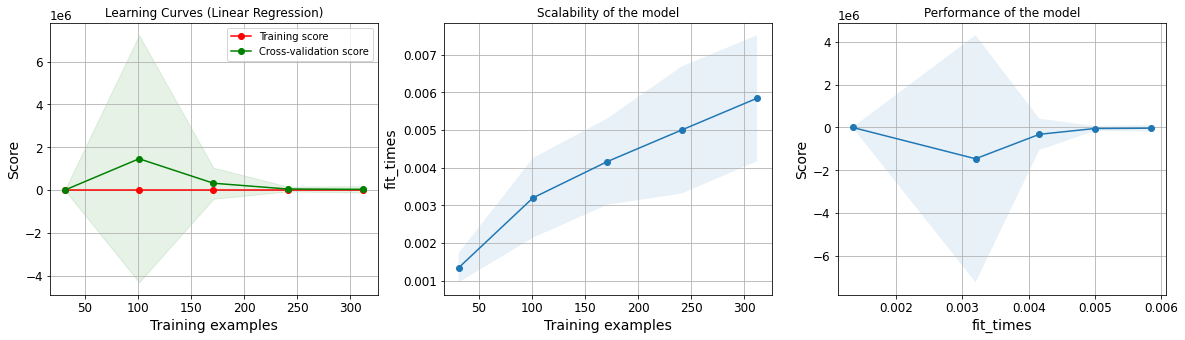

In [85]:
from sklearn.linear_model import LinearRegression
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = LinearRegression()

# 让训练集中每个特征的平方作为新的特征，获得扩展的特征集 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly包含原始特征并加上这个特征的平方
X_poly = poly_features.fit_transform(X) 

title = "Learning Curves (Linear Regression)"
plot_learning_curve(estimator, title, X_poly, y,
                    n_jobs=-1, cv=cv)

## 早期停止法

In [86]:
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# 建立一个管道机制
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

# 对数据进行预处理
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_test)

# 使用随机梯度下降法训练多项式回归模型
# warm_start=True将会在在训练结束的地方继续进行梯度下降迭代，而非是从头开始
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    # 从它停止的地方继续开始
    sgd_reg.fit(X_train_poly_scaled, y_train)  
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_test, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [87]:
# 获得最佳的模型的最好迭代次数
best_epoch

0

In [88]:
# 获得最佳模型，尽量避免过拟合
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)